In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#data downloaded directly from the OFLC, with a handful of columns dropped (zip codes, etc.)
df = pd.read_excel('H-1B_Disclosure_Data_FY15_Q4.xlsx', converters={'NAIC_CODE':str})

In [27]:
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,...,PW_WAGE_SOURCE_YEAR,PW_WAGE_SOURCE_OTHER,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE
0,I-200-09121-701936,WITHDRAWN,2015-02-05,2015-02-05,H-1B,02/09/2015,02/28/2015,"MEDTRONIC, INC.",710 MEDTRONIC PARKWAY NE,NaN,...,2014.0,ONLINE DATA SURVEY,20000 -,Year,N,N,EDEN PRAIRIE,STERNS,CA,55412
1,I-200-09146-796321,CERTIFIED,2014-12-12,2014-12-18,H-1B,01/05/2015,01/04/2018,UNIVERSITY OF OKLAHOMA,905 ASP AVE,NEL BLDG 207,...,2014.0,OFLC ONLINE DATA CENTER,85000.00 -,Year,N,N,NORMAN,CLEVELAND,OK,73019
2,I-200-09180-329758,WITHDRAWN,2013-01-03,2014-12-15,H-1B,01/07/2013,01/06/2016,NOKIA INC.,6021 CONNECTION DRIVE,NaN,...,2012.0,OFLC ONLINE DATA CENTER,94000 -,Year,N,N,SAN DIEGO,SAN DIEGO,CA,92127
3,I-200-09183-259985,CERTIFIED,2015-03-10,2015-03-16,H-1B,09/07/2015,09/07/2018,"OMRON OILFIELD AND MARINE, INC.",9510 N. HOUSTON ROSSLYN ROAD,NaN,...,2014.0,OFLC ONLINE DATA CENTER,66000 - 70000,Year,N,N,HOUSTON,HARRIS,TX,77088
4,I-200-09189-800933,CERTIFIED,2014-12-17,2014-12-23,H-1B,06/06/2015,06/05/2018,FEDERAL HOME LOAN MORTGAGE CO.,8250 JONES BRANCH DRIVE,MSA3E,...,2014.0,OFLC ONLINE DATA CENTER,97000 - 143300,Year,N,N,MCLEAN,FAIRFAX,VA,22102


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618804 entries, 0 to 618803
Data columns (total 40 columns):
CASE_NUMBER              618804 non-null object
CASE_STATUS              618804 non-null object
CASE_SUBMITTED           618804 non-null datetime64[ns]
DECISION_DATE            618804 non-null datetime64[ns]
VISA_CLASS               618804 non-null object
EMPLOYMENT_START_DATE    618785 non-null object
EMPLOYMENT_END_DATE      618785 non-null object
EMPLOYER_NAME            618781 non-null object
EMPLOYER_ADDRESS1        618778 non-null object
EMPLOYER_ADDRESS2        310861 non-null object
EMPLOYER_CITY            618773 non-null object
EMPLOYER_STATE           618761 non-null object
EMPLOYER_POSTAL_CODE     618766 non-null object
EMPLOYER_COUNTRY         618782 non-null object
EMPLOYER_PROVINCE        8760 non-null object
EMPLOYER_PHONE           618742 non-null float64
EMPLOYER_PHONE_EXT       38244 non-null float64
AGENT_ATTORNEY_NAME      391678 non-null object
AGENT_ATTO

In [30]:
df['TOTAL WORKERS'].sum()

1258354.0

In [31]:
#filter data to NJ employers only
nj_emp = df[df['EMPLOYER_STATE'] == 'NJ']

In [32]:
#automatically calculated columns for all "numerical" data. This is just to get a feel.
nj_emp.describe()

,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,TOTAL WORKERS,PREVAILING_WAGE,PW_WAGE_SOURCE_YEAR
count,8.770100e+04,6163.000000,87701.000000,87701.000000,87699.000000
mean,6.562068e+09,687.857699,2.113511,63958.772792,2014.293310
std,4.684508e+09,1855.700493,3.850254,19207.116290,0.538747
min,2.840000e+02,0.000000,1.000000,8.710000,2001.000000
25%,6.094520e+09,NaN,1.000000,55120.000000,NaN
50%,7.324382e+09,NaN,1.000000,62962.000000,NaN
75%,7.326824e+09,NaN,1.000000,73237.000000,NaN
max,9.122678e+11,67582.000000,60.000000,731240.000000,2015.000000


In [33]:
#totals for numerical columns. Again, just a quick feel. Noted -- 92,120 total workers for 2017, a drop from 2016.
nj_emp.sum()

EMPLOYER_PHONE         5.754999e+14
EMPLOYER_PHONE_EXT     4.239267e+06
TOTAL WORKERS          1.853570e+05
PREVAILING_WAGE        5.609248e+09
PW_WAGE_SOURCE_YEAR    1.766515e+08
dtype: float64

In [34]:
from datetime import datetime

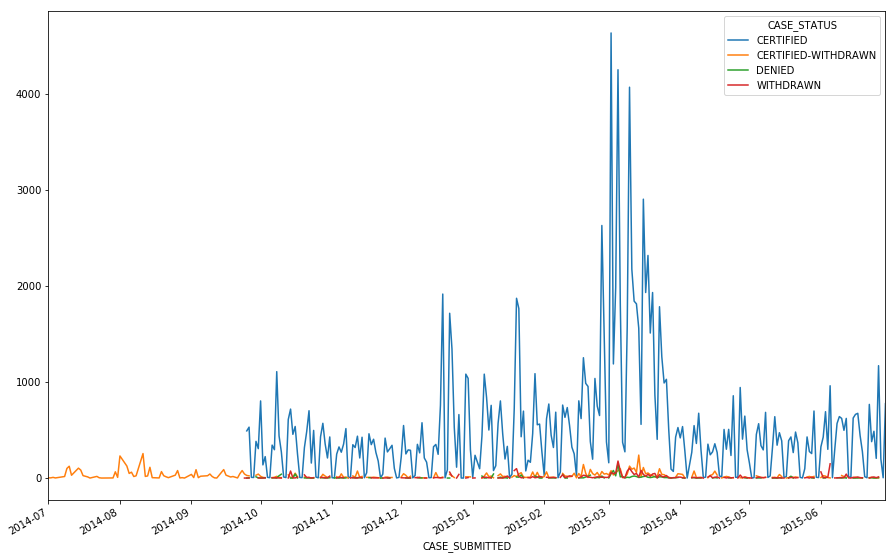

In [36]:
#out of all cases submitted during FY17, what is their status?
nj_emp[(nj_emp['CASE_SUBMITTED']>'2014-06-30')&(nj_emp['CASE_SUBMITTED']<'2015-06-30')].pivot_table(index='CASE_SUBMITTED', columns='CASE_STATUS', values='TOTAL WORKERS', aggfunc=sum).plot(figsize=[15,10]);

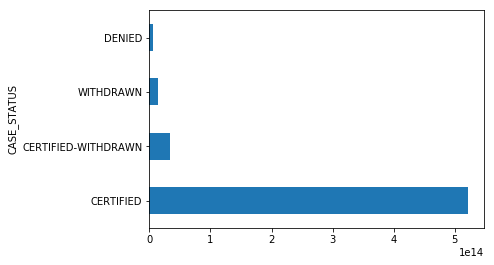

In [37]:
#dividing into status groups.
nj_emp.groupby('CASE_STATUS').sum().iloc[:,0].sort_values(ascending=False).plot(kind='barh');

In [38]:
#I was curious about the sudden spike in withdrawn applications
#it appears to most be because of one company
nj_emp[nj_emp['CASE_STATUS'] == 'CERTIFIED-WITHDRAWN'].groupby('EMPLOYER_NAME').sum().iloc[:,0].sort_values(ascending=False).head()

EMPLOYER_NAME
WIPRO LIMITED                   1.081916e+13
MARLABS, INC                    2.864834e+12
AVIGHNA GLOBAL SOLUTIONS LLC    8.056093e+11
INTALENT LLC                    6.080787e+11
INTEGRATED RESOURCES, INC       4.908080e+11
Name: EMPLOYER_PHONE, dtype: float64

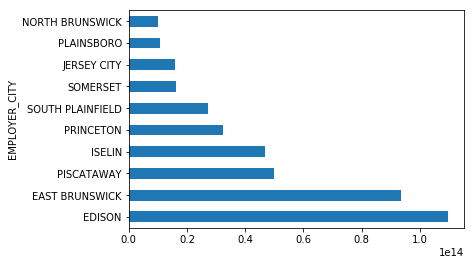

In [39]:
#top cities that employed H1B visa workers
nj_emp.groupby('EMPLOYER_CITY').sum().iloc[:,0].sort_values(ascending=False).head(10).plot(kind='barh');

In [40]:
#The national data filtered down to workers who physically worked in NJ
nj_work = df[df['WORKSITE_STATE'] == 'NJ']

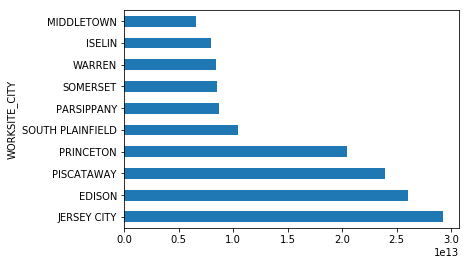

In [41]:
#top cities for H1B visa employees to work in
nj_work.groupby('WORKSITE_CITY').sum().iloc[:,0].sort_values(ascending=False).head(10).plot(kind='barh');

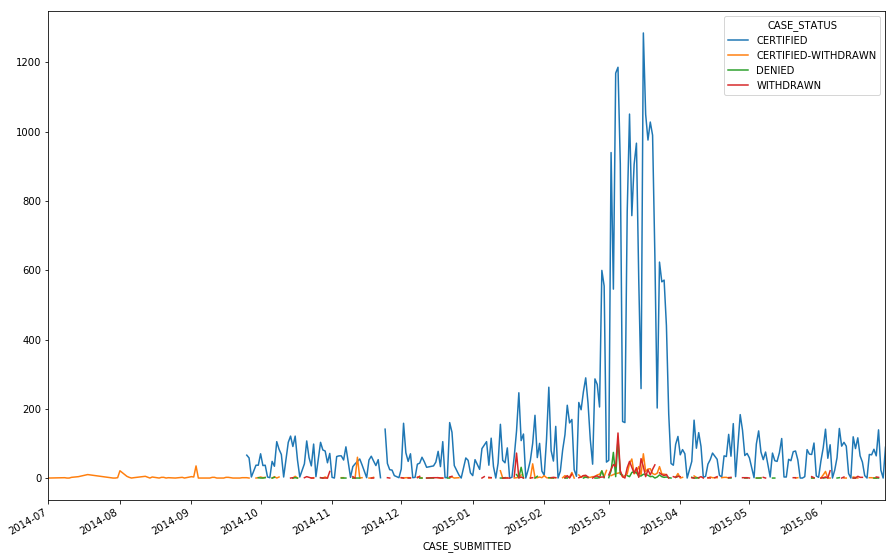

In [44]:
#same as above, but for place of work.
nj_work[(nj_work['CASE_SUBMITTED']>'2014-06-30')&(nj_emp['CASE_SUBMITTED']<'2015-06-30')].pivot_table(index='CASE_SUBMITTED', columns='CASE_STATUS', values='TOTAL WORKERS', aggfunc=sum).plot(figsize=[15,10]);

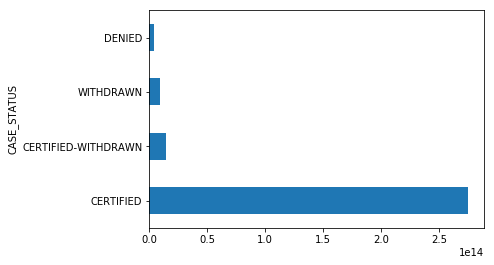

In [45]:
nj_work.groupby('CASE_STATUS').sum().iloc[:,0].sort_values(ascending=False).plot(kind='barh');

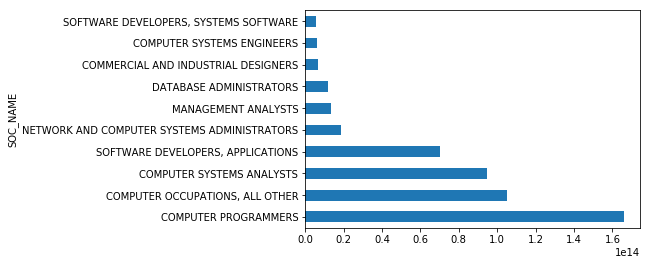

In [46]:
#top fields of employment for NJ employers
nj_emp.groupby('SOC_NAME').sum().iloc[:,0].sort_values(ascending=False).head(10).plot(kind='barh');

In [48]:
#total number of workers working for companies that are willful violators
nj_emp.groupby('WILLFUL VIOLATOR').sum().iloc[:,0].sort_values(ascending=False).head(10)

WILLFUL VIOLATOR
N    5.715640e+14
Y    9.445783e+11
Name: EMPLOYER_PHONE, dtype: float64

In [50]:
#unique number of companies that were listed as wilfull violators
nj_emp[nj_emp['WILLFUL VIOLATOR'] == 'Y']['EMPLOYER_NAME'].nunique()

44

In [51]:
nj_emp['EMPLOYMENT_START_DATE'].unique()

array([u'10/24/2014', u'02/21/2013', u'04/16/2015', ..., u'03/21/2016',
       u'03/20/2016', u'03/13/2016'], dtype=object)

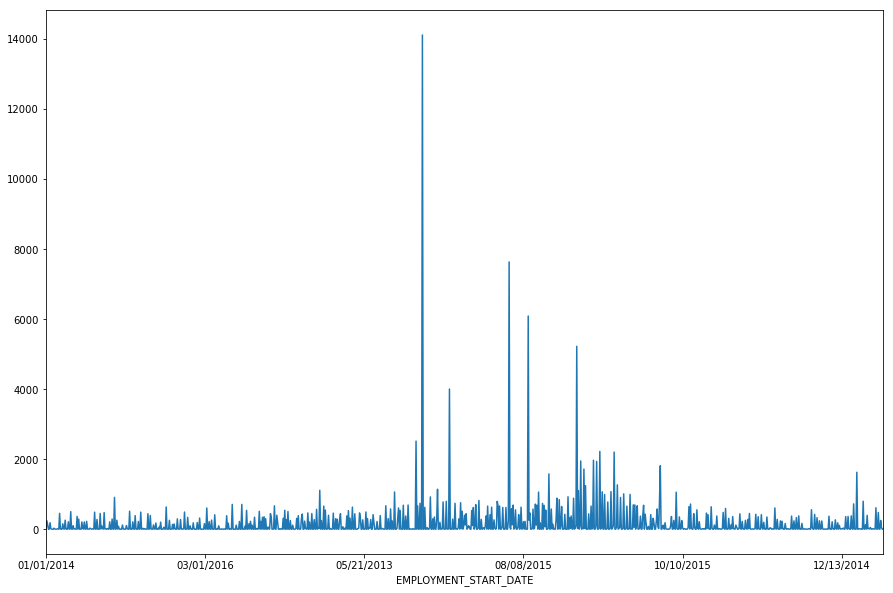

In [53]:
nj_emp.pivot_table(index='EMPLOYMENT_START_DATE', values='TOTAL WORKERS', aggfunc=sum).plot(figsize=[15,10]);

In [54]:
nj_emp.groupby('EMPLOYER_NAME').sum().iloc[:,0].sort_values(ascending=False).head(10)

EMPLOYER_NAME
WIPRO LIMITED                       8.937344e+13
LARSEN & TOUBRO INFOTECH LIMITED    2.572389e+13
IGATE TECHNOLOGIES INC.             2.290348e+13
ERNST & YOUNG U.S. LLP              8.365588e+12
MINDTREE LIMITED                    7.768480e+12
L&T TECHNOLOGY SERVICES LIMITED     7.410356e+12
HEXAWARE TECHNOLOGIES, INC.         7.325105e+12
COMPUNNEL SOFTWARE GROUP, INC.      5.297484e+12
SYNECHRON, INC.                     5.250362e+12
VEDICSOFT SOLUTIONS LLC             5.086370e+12
Name: EMPLOYER_PHONE, dtype: float64